<div style="background-color: #f9fbe7; border: 2px solid #4caf50; border-radius: 5px; padding: 20px; margin: 20px 0;">
    <h2 style="color: #4caf50; font-size: 28px; margin-bottom: 15px;">👥 Exercise 11: Unveiling Human Capital Insights</h2>
    <p style="font-size: 18px;">Embark on a data exploration journey with the captivating Human Resource dataset.</p>
    <ol style="list-style-type: decimal; margin: 20px 0; padding-left: 30px; font-size: 18px;">
        <li style="margin-bottom: 10px;">
            <span style="color: #4caf50; font-weight: bold;">🔍 Discover and Visualize:</span><br>
            Delve into the dataset's mysteries and uncover its insightful tales.<br>
            Enchanting visualizations shall illuminate the essence of the data.
        </li>
        <li style="margin-bottom: 10px;">
            <span style="color: #4caf50; font-weight: bold;">🔧 Craft the Data:</span><br>
            Invoke the powerful arts of preprocessing to refine the data's essence.<br>
            Transform the raw chaos into an elegantly structured symphony.
        </li>
        <li style="margin-bottom: 10px;">
            <span style="color: #4caf50; font-weight: bold;">🔮 Choose Your Regression Elixir:</span><br>
            Select a regression elixir that resonates with the spirit of your data.<br>
            Unearth concealed patterns using the mystical powers of prediction.
        </li>
        <li>
            <span style="color: #4caf50; font-weight: bold;">✨ Evaluate Your Enchantment:</span><br>
            Cast your chosen spell upon the data and bear witness to its magic.<br>
            Gauge the summoned outcomes against the rich tapestry of reality.
        </li>
    </ol>
</div>


![hr](hr.jpg)

<div style="background-color: #f0f8ff; border: 2px solid #1e90ff; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #1e90ff; font-size: 20px;">Step 1: Get and visualize informations</h2>
    <ul style="list-style: none; padding-left: 0;">
    </ul>
</div>

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">Import required libraries</h2>
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn import metrics

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">Load and get informations</h2>
</div>

In [2]:
data = pd.read_csv('HR.csv')

In [3]:
data.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.8,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2,5,7,5,2
average_montly_hours,157,262,272,223,159
time_spend_company,3,6,4,5,3
Work_accident,0,0,0,0,0
left,1,1,1,1,1
promotion_last_5years,0,0,0,0,0
sales,sales,sales,sales,sales,sales
salary,low,medium,medium,low,low


## <span style="color: red;">Explanation of Columns</span>

| Column                | Description                                                                                                    |
|:----------------------|:---------------------------------------------------------------------------------------------------------------|
| satisfaction_level    | Employee satisfaction level, typically ranging from 0 to 1, indicating how content an employee is with their job. |
| last_evaluation      | Score given to an employee's last performance evaluation, often on a scale from 0 to 1, representing their recent job performance. |
| number_project       | Number of projects an employee is currently working on. This provides insight into an employee's workload.    |
| average_monthly_hours | The average number of hours an employee works per month. This gives an idea of their work hours and potential workload. |
| time_spend_company   | Number of years an employee has spent with the company. This indicates their tenure and potential loyalty to the organization. |
| Work_accident        | Binary indicator (0 or 1) whether an employee has had a work-related accident. This provides insight into workplace safety. |
| left                 | Binary indicator (0 or 1) whether an employee has left the company. This is often used to predict employee attrition. |
| promotion_last_5years| Binary indicator (0 or 1) whether an employee has been promoted in the last 5 years. This reflects recent career advancement. |
| sales                | The department or functional area within the company where the employee works. This categorizes their job role. ('sales', 'accounting', 'hr', 'technical', 'support', 'management','IT', 'product_mng', 'marketing', 'RandD') |
| salary               | The level of salary an employee receives, often categorized as 'low', 'medium', or 'high'. |


In [4]:
def data_information(data):
    
    print("\033[1;41m"+'Informations:'+"\033[0m")
    print(13*'=')
    print(data.info())
    print(50*'-')
    
    print("\033[1;42m"+'Column names:'+"\033[0m")
    print(13*'=')
    print(data.columns)
    print(50*'-')
    
    print("\033[1;45m"+'Shape of dataset:'+"\033[0m", data.shape)
    print(50*'-')
    
    print("\033[1;46m"+'Is Null data:'+"\033[0m")
    print(13*'=')
    print(data.isnull().any())
    print(50*'-')
    
    print("\033[1;47m"+'Number of Null data:'+"\033[0m")
    print(20*'=')
    print(data.isnull().sum())
    print(50*'-')
    
    print("\033[1;43m"+'Unique data:'+"\033[0m")
    print(12*'=')
    print(data.nunique())
    print(50*'-')
    
    print("\033[1;44m"+'Statistical reports:'+"\033[0m")
    print(20*'=')
    print(data.describe().T)
    

In [5]:
data_information(data)

Informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
--------------------------------------------------
Column names:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'W

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">Visualize dataset</h2>
</div>

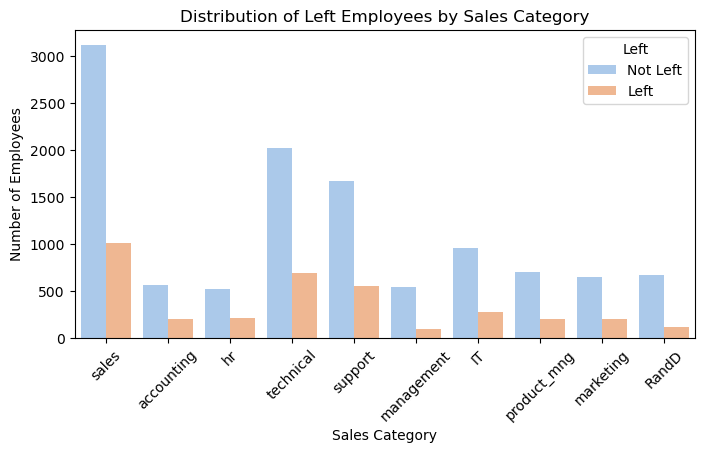

In [6]:
# Custom color palette for the plot
custom_palette = sns.color_palette("pastel") 

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 4))
sns.set_palette(custom_palette)
sns.countplot(data=data, x=data['sales'], hue='left')
plt.title('Distribution of Left Employees by Sales Category')
plt.xlabel('Sales Category')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Not Left', 'Left'])
plt.xticks(rotation=45)
plt.show()

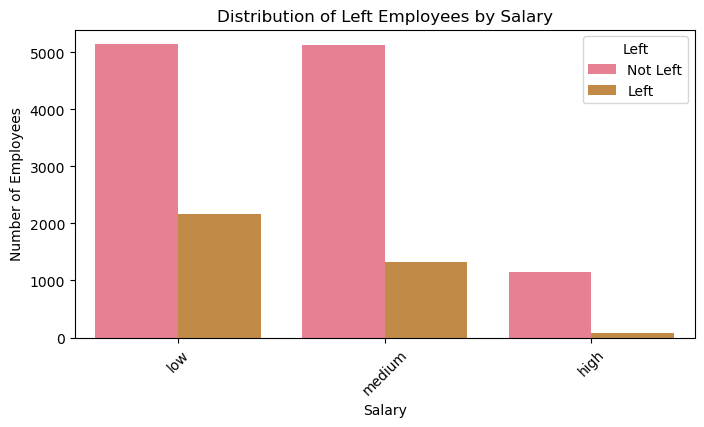

In [7]:
# Custom color palette for the plot
custom_palette = sns.color_palette("husl", 9) 

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 4))
sns.set_palette(custom_palette)
sns.countplot(data=data, x=data['salary'], hue='left')
plt.title('Distribution of Left Employees by Salary')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Not Left', 'Left'])
plt.xticks(rotation=45)
plt.show()

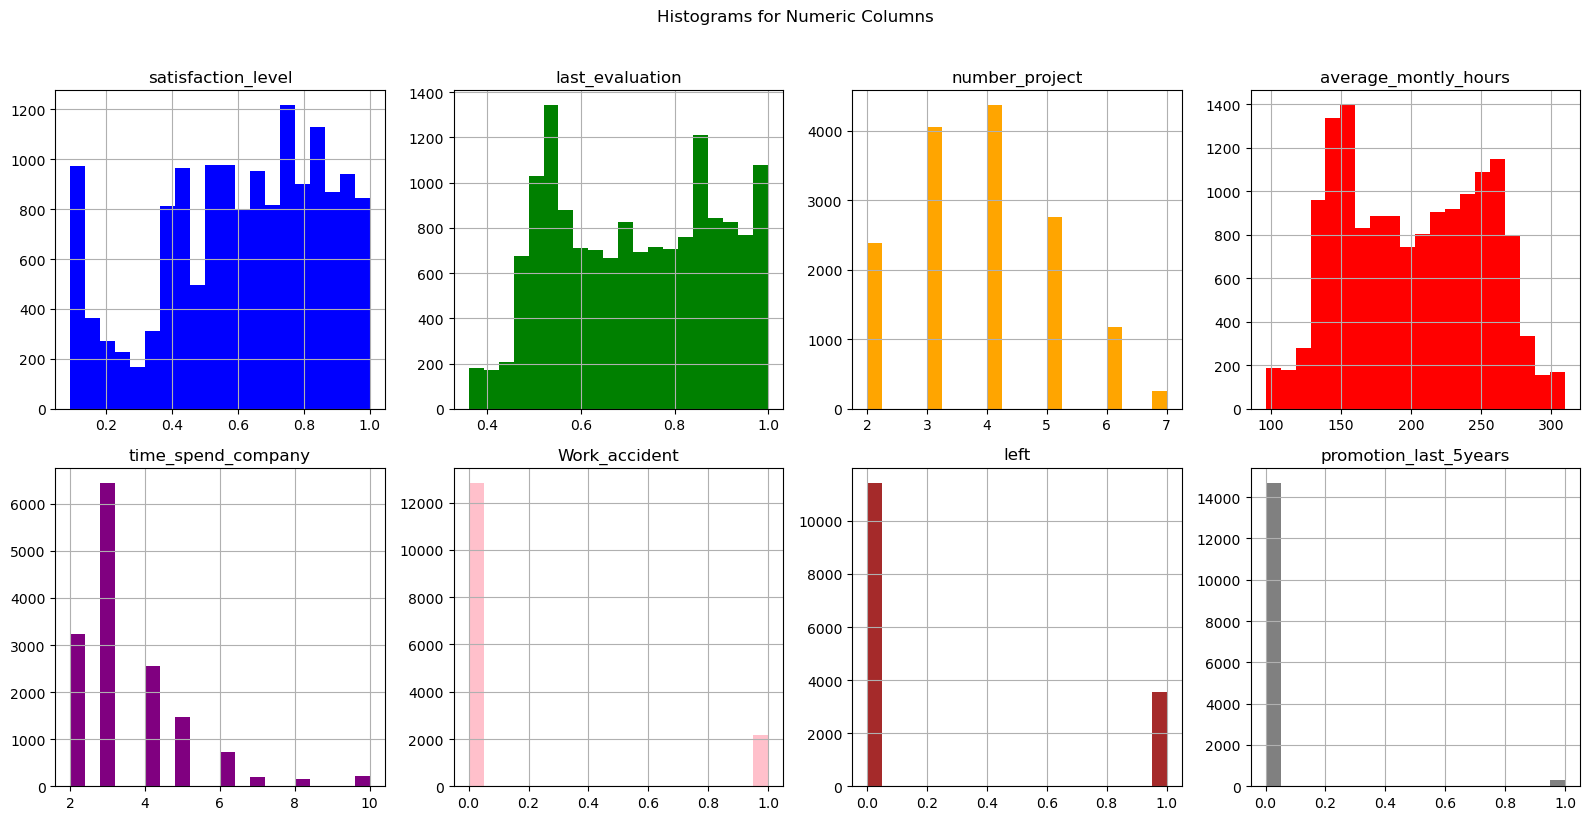

In [8]:
# Get numeric column names
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns for the subplot layout
num_rows = 2
num_cols = 4

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
fig.suptitle("Histograms for Numeric Columns", y=1.02)

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()

# Define colors for histograms
hist_colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'brown', 'gray']

# Plot histograms for each numeric column with specified colors
for i, col in enumerate(numeric_columns):
    data[col].hist(ax=axes[i], bins=20, color=hist_colors[i % len(hist_colors)])
    axes[i].set_title(col)

# Remove any remaining empty subplots
for j in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


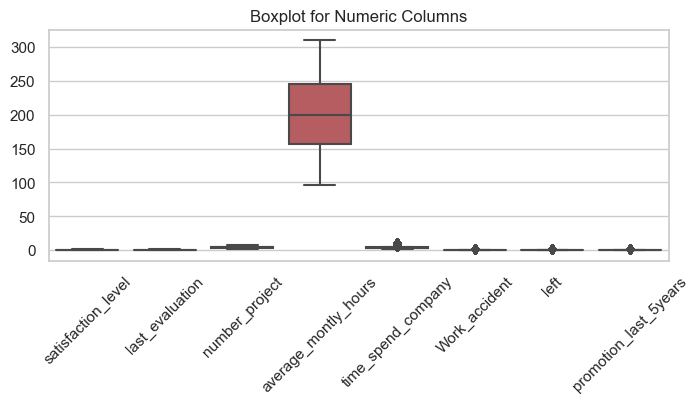

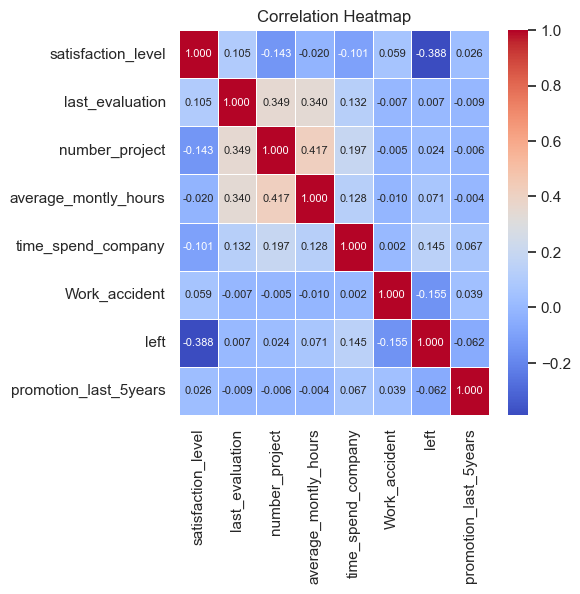

In [9]:
# Set a style for seaborn
sns.set(style="whitegrid")

# Box plot for numeric columns
plt.figure(figsize=(8, 3))
sns.boxplot(data=data)
plt.title("Boxplot for Numeric Columns")
plt.xticks(rotation=45)
plt.show()


# Correlation heatmap
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f",
            annot_kws={"size": 8}, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


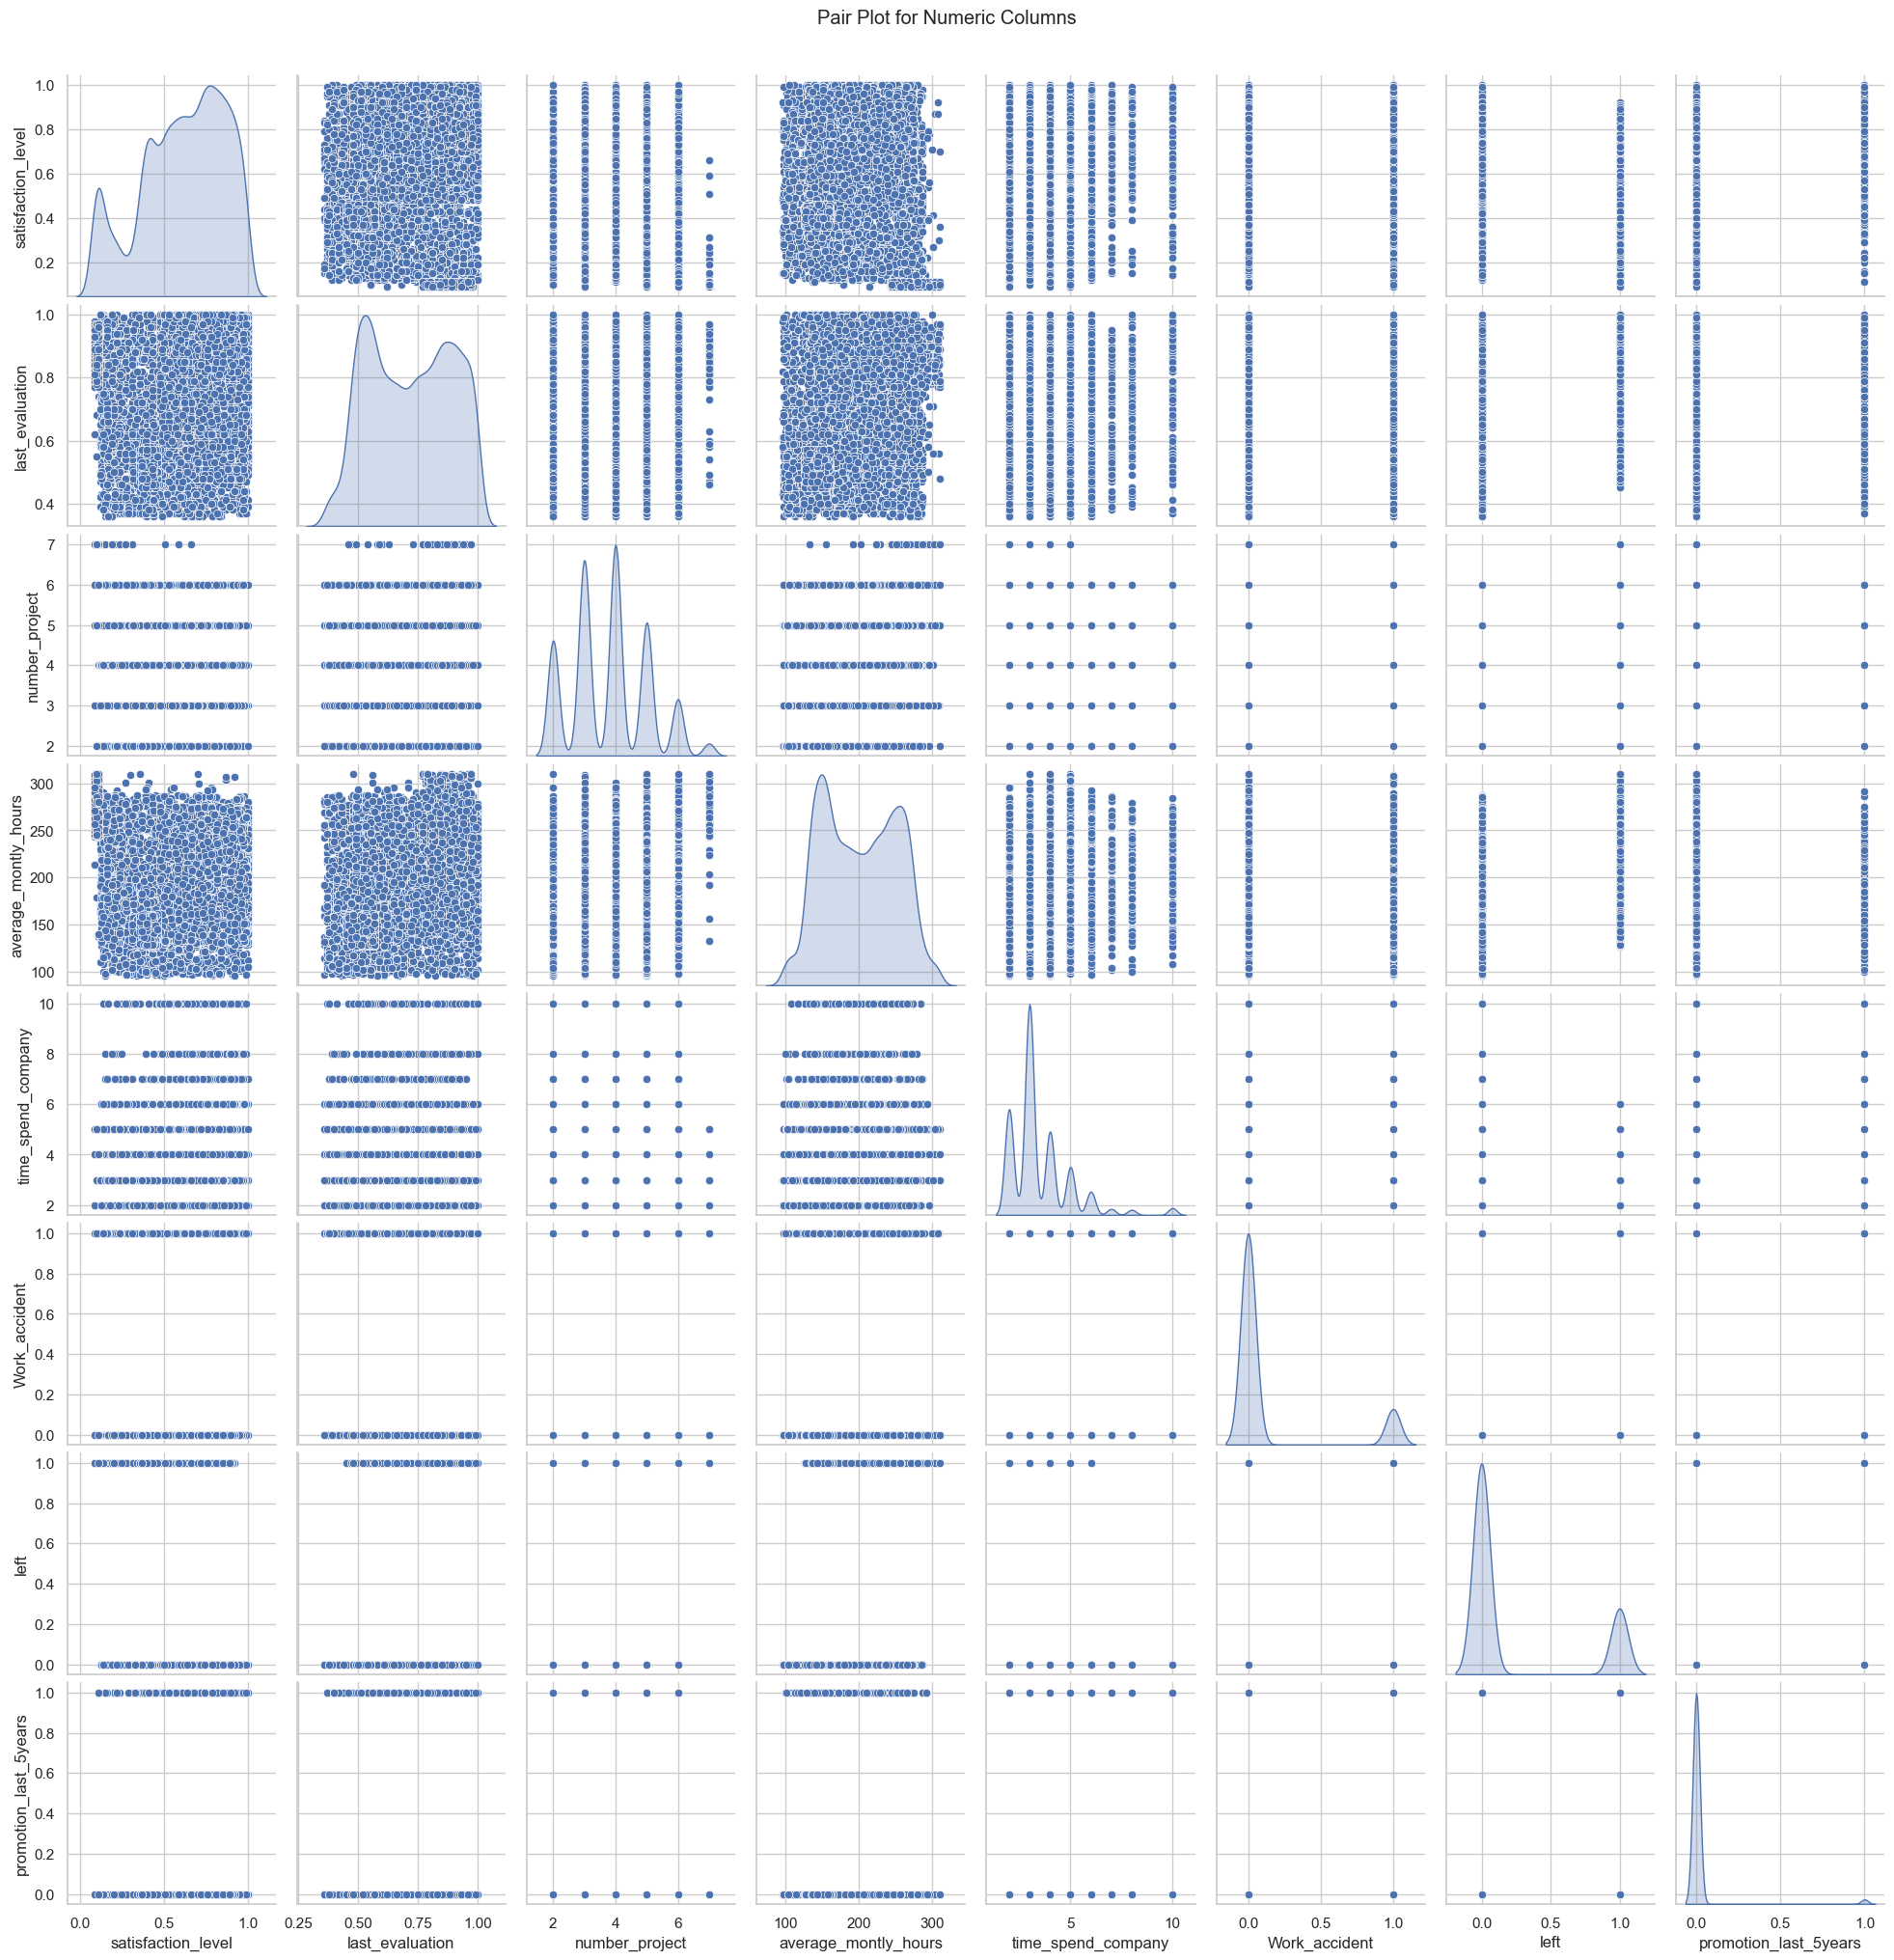

In [10]:
# Pair plot
sns.pairplot(data, diag_kind='kde')
plt.suptitle("Pair Plot for Numeric Columns", y=1.02)
plt.show()

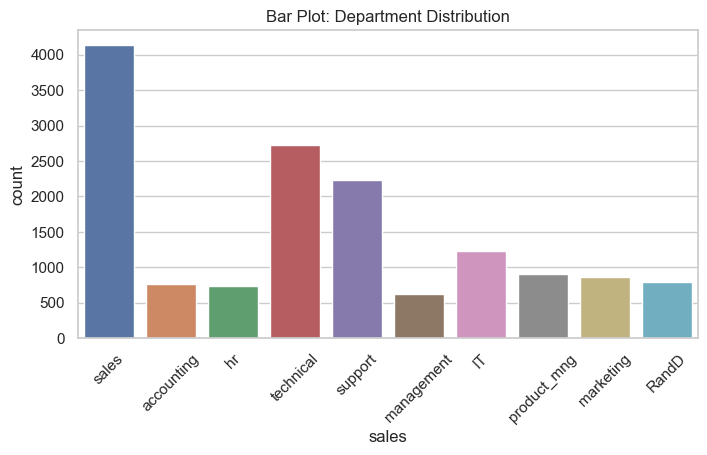

In [11]:
# Bar plot for categorical column 'sales'
plt.figure(figsize=(8, 4))
sns.countplot(x=data['sales'], data=data)
plt.title("Bar Plot: Department Distribution")
plt.xticks(rotation=45)
plt.show()

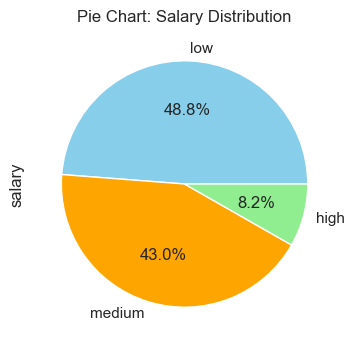

In [12]:
# Pie chart for 'salary' distribution
plt.figure(figsize=(4,4))
data['salary'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
plt.title("Pie Chart: Salary Distribution")
plt.show()

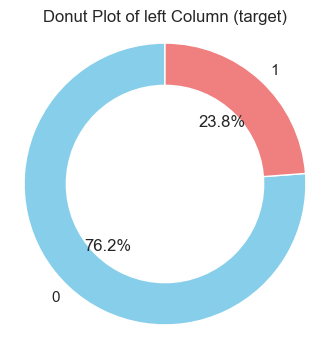

In [13]:
# Assuming you have a binary_column containing 0s and 1s
binary_counts = data['left'].value_counts()

# Create a donut plot
plt.figure(figsize=(4, 4))
plt.pie(binary_counts, labels=binary_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
center_circle = plt.Circle((0,0),0.70,fc='white')  # Adding a white circle to create the "donut" effect
plt.gca().add_artist(center_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Donut Plot of left Column (target)')
plt.show()


<div style="background-color: #f0f8ff; border: 2px solid #1e90ff; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #1e90ff; font-size: 20px;">Step 2: Apply preprocessing methods</h2>
    <ul style="list-style: none; padding-left: 0;">
    </ul>
</div>


In [14]:
data_encoded = pd.get_dummies(data, columns=['sales', 'salary'])


In [15]:
data_encoded.head().T

,0,1,2,3,4
satisfaction_level,0.38,0.80,0.11,0.72,0.37
last_evaluation,0.53,0.86,0.88,0.87,0.52
number_project,2.00,5.00,7.00,5.00,2.00
average_montly_hours,157.00,262.00,272.00,223.00,159.00
time_spend_company,3.00,6.00,4.00,5.00,3.00
Work_accident,0.00,0.00,0.00,0.00,0.00
left,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,0.00,0.00,0.00,0.00,0.00
sales_IT,0.00,0.00,0.00,0.00,0.00
sales_RandD,0.00,0.00,0.00,0.00,0.00


In [16]:
# Separate features and target
X = data_encoded.drop('left', axis=1)
y = data_encoded['left']

In [17]:
# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

In [19]:
print("\033[1;35m"+'The shape of train set:'+"\033[0m", X_train.shape)
print(35*'+')
print("\033[1;35m"+'The shape of test set:'+"\033[0m", X_test.shape)

The shape of train set: (11999, 20)
+++++++++++++++++++++++++++++++++++
The shape of test set: (3000, 20)


In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)

# Apply SMOTE to the preprocessed data
X_re, y_re = smote.fit_resample(X_train, y_train)


<div style="background-color: #f0f8ff; border: 2px solid #1e90ff; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #1e90ff; font-size: 20px;">Step 3, 4: Choose a regression method and then Evaluate the chosen method</h2>
    <ul style="list-style: none; padding-left: 0;">
    </ul>
</div>

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">1. XGBoost method</h2>
</div>

## XGBoost Objective Functions

### Regression Objectives

- <span style="color: blue;">**reg:squarederror**</span>: Regression with squared loss.

- <span style="color: blue;">**reg:squaredlogerror**</span>: Regression with squared log loss.

- <span style="color: blue;">**reg:logistic**</span>: Logistic regression.

- <span style="color: blue;">**reg:pseudohubererror**</span>: Regression with Pseudo Huber loss, an alternative to absolute loss.

- <span style="color: blue;">**reg:absoluteerror**</span>: Regression with L1 error. In tree models, leaf values are refreshed after tree construction. In distributed training, the leaf value is the mean from all workers.

### Binary Classification Objectives

- <span style="color: green;">**binary:logistic**</span>: Logistic regression for binary classification, output probability.

- <span style="color: green;">**binary:logitraw**</span>: Logistic regression for binary classification, output score before logistic transformation.

- <span style="color: green;">**binary:hinge**</span>: Hinge loss for binary classification, producing 0 or 1 predictions.

### Count Data Objective

- <span style="color: orange;">**count:poisson**</span>: Poisson regression for count data, output mean of Poisson distribution. Default `max_delta_step` is 0.7.

### Survival Objectives

- <span style="color: red;">**survival:cox**</span>: Cox regression for right-censored survival time data, predictions returned as hazard ratios.

- <span style="color: red;">**survival:aft**</span>: Accelerated failure time model for censored survival time data.

- <span style="color: red;">**aft_loss_distribution**</span>: Probability Density Function used by survival:aft objective and aft-nloglik metric.

### Multiclass Classification Objectives

- <span style="color: purple;">**multi:softmax**</span>: Multiclass classification using the softmax objective. Requires setting `num_class`.

- <span style="color: purple;">**multi:softprob**</span>: Same as softmax, outputs a vector of predicted probabilities for each class.

### Ranking Objectives

- <span style="color: brown;">**rank:pairwise**</span>: LambdaMART for pairwise ranking, minimizing pairwise loss.

- <span style="color: brown;">**rank:ndcg**</span>: LambdaMART for list-wise ranking, maximizing NDCG.

- <span style="color: brown;">**rank:map**</span>: LambdaMART for list-wise ranking, maximizing Mean Average Precision (MAP).

### Regression Objectives (Distributional)

- <span style="color: teal;">**reg:gamma**</span>: Gamma regression with log-link, useful for modeling gamma-distributed outcomes.

- <span style="color: teal;">**reg:tweedie**</span>: Tweedie regression with log-link, useful for modeling Tweedie-distributed outcomes.


for more details about another parameters, see:
https://xgboost.readthedocs.io/en/stable/parameter.html

In [21]:
xg_reg = xgb.XGBRegressor(objective= 'binary:logistic', colsample_bytree=0.8, learning_rate=0.1, 
                          max_depth=6, n_estimators=1000, random_state=42, verbosity=1)

xg_reg.fit(X_re, y_re)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='binary:logistic', predictor=None, ...)

In [22]:
# Predict on test data
y_pred = xg_reg.predict(X_test)

In [23]:
# Evaluate the model
print("\033[1;31m"+'MAE:'+"\033[0m", metrics.mean_absolute_error(y_test, y_pred))
print("\033[1;46m"+3*'='+"\033[0m")
print("\033[1;31m"+'R2 Score:'+"\033[0m", metrics.r2_score(y_test, y_pred))
print("\033[1;46m"+3*'='+"\033[0m")
print("\033[1;31m"+'Prediction:'+"\033[0m", y_pred)
print("\033[1;46m"+3*'='+"\033[0m")
print("\033[1;31m"+'Length of prediction:'+"\033[0m",len(y_pred))

MAE: 0.018688217637426906
===
R2 Score: 0.93369358832679
===
Prediction: [1.3135511e-05 1.2677474e-04 4.1963693e-05 ... 1.0126763e-03 8.5598284e-01
 9.9945158e-01]
===
Length of prediction: 3000


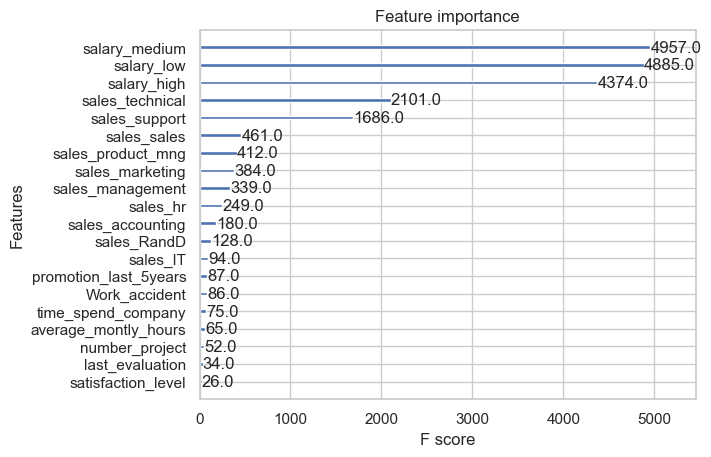

In [24]:
xgb.plot_importance(xg_reg).set_yticklabels(X.columns);

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">2. AdaBoost Regressor method</h2>
</div>

In [25]:
ada_model = AdaBoostRegressor(n_estimators = 200, learning_rate = 0.01, 
                              loss = 'exponential', random_state = 42)
ada_model.fit(X_re, y_re)

AdaBoostRegressor(learning_rate=0.01, loss='exponential', n_estimators=200,
                  random_state=42)

In [26]:
ada_predictions = ada_model.predict(X_test)

In [27]:
# Evaluate the model
print("\033[1;31m"+'MAE:'+"\033[0m", metrics.mean_absolute_error(y_test, ada_predictions))
print("\033[1;46m"+3*'='+"\033[0m")
print("\033[1;31m"+'R2 Score:'+"\033[0m", metrics.r2_score(y_test, ada_predictions))
print("\033[1;46m"+3*'='+"\033[0m")
print("\033[1;31m"+'Prediction:'+"\033[0m", ada_predictions)

MAE: 0.13166510829242997
===
R2 Score: 0.7324026913340531
===
Prediction: [0.05949657 0.05949657 0.05949657 ... 0.05949657 0.06428978 0.21814672]


In [33]:
ada_predictions.round().sum()

753.0

<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">3. Logistic Regression</h2>
</div>

In [28]:
log_model = LogisticRegression(solver='newton-cholesky')
log_model.fit(X_re, y_re)


LogisticRegression(solver='newton-cholesky')

In [29]:
log_predictions = log_model.predict(X_test)

In [30]:
# print("\033[1;31m"+'MAE:'+"\033[0m", metrics.mean_absolute_error(y_test, log_predictions))
# print("\033[1;46m"+27*'='+"\033[0m")
# print("\033[1;31m"+'R2 Score:'+"\033[0m", metrics.r2_score(y_test, log_predictions))
# print("\033[1;46m"+27*'='+"\033[0m")
# print("\033[1;31m"+'Prediction:'+"\033[0m", log_predictions)


In [31]:
print(metrics.classification_report(y_test, log_predictions))
print(metrics.confusion_matrix(y_test, log_predictions))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      2294
           1       0.50      0.80      0.62       706

    accuracy                           0.77      3000
   macro avg       0.71      0.78      0.72      3000
weighted avg       0.83      0.77      0.78      3000

[[1734  560]
 [ 140  566]]


<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">4. Linear Regression</h2>
</div>

In [ ]:
# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_re)
X_test_poly = poly.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_poly, y_re)

In [ ]:
linear_predictions = model.predict(X_test_poly)

In [ ]:
print("\033[1;31m"+'MAE:'+"\033[0m", metrics.mean_absolute_error(y_test, ada_predictions))
print("\033[1;46m"+27*'='+"\033[0m")
print("\033[1;31m"+'R2 Score:'+"\033[0m", metrics.r2_score(y_test, linear_predictions))
print("\033[1;46m"+27*'='+"\033[0m")
print("\033[1;31m"+'Prediction:'+"\033[0m", linear_predictions)


<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">5. Ridge Regression</h2>
</div>

In [ ]:
ridge_model = Ridge(alpha=0.3, solver = 'saga')  # You can adjust the alpha parameter
ridge_model.fit(X_re, y_re)


In [ ]:
ridge_predictions = ridge_model.predict(X_test)

In [ ]:
print("\033[1;31m"+'MAE:'+"\033[0m", metrics.mean_absolute_error(y_test, ada_predictions))
print("\033[1;46m"+27*'='+"\033[0m")
print("\033[1;31m"+'R2 Score:'+"\033[0m", metrics.r2_score(y_test, ridge_predictions))
print("\033[1;46m"+27*'='+"\033[0m")
print("\033[1;31m"+'Prediction:'+"\033[0m", ridge_predictions)


<div style="background-color: #fdf5e6; border: 2px solid #ff6347; border-radius: 5px; padding: 10px; margin: 10px 0;">
    <h2 style="color: #ff6347; font-size: 16px;">6. Lasso Regression</h2>
</div>

In [ ]:
lasso_model = Lasso(alpha=0.2, selection= 'random')  # You can adjust the alpha parameter
lasso_model.fit(X_re, y_re)

In [ ]:
lasso_predictions = lasso_model.predict(X_test)

In [ ]:
print("\033[1;31m"+'MAE:'+"\033[0m", metrics.mean_absolute_error(y_test, ada_predictions))
print("\033[1;46m"+27*'='+"\033[0m")
print("\033[1;31m"+'R2 Score:'+"\033[0m", metrics.r2_score(y_test, lasso_predictions))
print("\033[1;46m"+27*'='+"\033[0m")
print("\033[1;31m"+'Prediction:'+"\033[0m", lasso_predictions)